<a href="https://colab.research.google.com/github/yula00/DAP_2022/blob/main/lecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Cars93 data
In this lab, we would like to explore data about 93 number of vehicles.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv')
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,5.0,177.0,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,6.0,193.0,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i


## Matplotlib
Please refer the [official doc](https://matplotlib.org/) or following [article](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) for further detailed tricks.

### Line-plot
Draw a line-plot for the age-specific height averages for men and women

- Men are represented in blue and women in red
- Use x_label() and y_label(), title(), and legend() to draw
- Use xticks() to separate the intervals on the x-axis graph

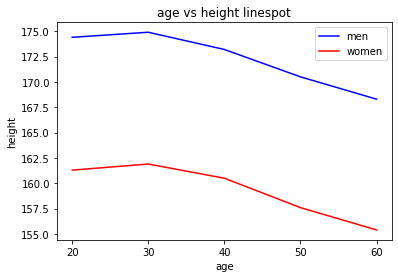

In [4]:
# Male Data
x = [20,30,40,50,60]
y = [174.4, 174.9, 173.2, 170.5, 168.3]

plt.plot(x,y,label='men',color='blue')

# Female Data
x = [20,30,40,50,60]
y = [161.3, 161.9, 160.5, 157.6, 155.4]

plt.plot(x,y,label='women',color='red')


# Sepsarate x 
plt.xticks(np.arange(20,70,10))

# Draw
plt.xlabel("age")
plt.ylabel("height")
plt.title("age vs height linespot")
plt.legend()

plt.show()

###Histogram Plot with Barplot
Draw the horsepower mean by type

- df_sample should contain only `Type` and `Horsepower` properties
- Drop the `NAN` value

Returns all the number of times for each value in the `Type` 


In [5]:
df['Type'].value_counts()

Midsize    22
Small      20
Compact    16
Sporty     12
Large      11
Van         9
Name: Type, dtype: int64

Use barh() to draw the histogram by `Type`


In [ ]:
# Draw plot
plt.barh(df['Type'].value_counts.index)
plt.title('Average of Horsepower by Type')
plt.xlabel('Mean')
plt.ylabel('Type')

### Pie Plot

Draw *pie chart* of `Type` (hint, refer pandas'  [`.value_counts`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) method and the [article](https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f) about *pie chart*).
Please give the `startangle` option to 30

- Use `autopct` to represent decimal places

In [ ]:
typeCount = df['Type'].value_counts(normalize=True)
# typeCount
fig, ax = plt.subplots(figsize=(6,6))

# Draw!!
ax.pie(
      typeCount,
      labels = typeCount.index,
      autopct = '1.1%f'
      startangle = 30
    )


plt.show()

## Seaborn
Please refer the [official doc](https://seaborn.pydata.org/).

### Boxplot
Plot *boxplot* which comparing the `Price` according to `Manufacturer`. The plot must satisify following conditions.
 * nested grouping within additional categorical variable, `Origin`
 * using `Blues` color palette


In [ ]:
fig, ax = plt.subplots(figsize=(31,8))
sns.boxplot(
    data=df, x='Manufacturer', y = 'Price'
)

plt.show()

### Heatmap and Pairplot
This part brought the correlation problem that was dealt with in the previous practice problem. Please refer `lecture3.ipynb`

- Select `Price`,`Horsepower`, `Passengers`, `Length`, `Weight`
- Put this in the `df`
- Use the `pearson` method to obtain the correlation value


In [7]:
targetVar = ['Price', 'Horsepower','Passengers','Length','Weight']
selectedDataFrame = df[targetVar]
corr = selectedDataFrame.corr(method='Pearson')
corr

ValueError: ignored

Make *heatmap*!
- Make it the `4th` decimal place
- Set the color to `bone_r`

In [6]:
ax = sns.heatmap(corr, annot=True, fmt=".4f",cmap="Reds")

NameError: ignored

Plot *pair plot*. The plot must satisify following conditions.

- Create a pair plot using the `targetvar` value above 
- Put the corr value in the pair plot in `text format`!

In [8]:
g = sns.pairplot(selectedDataFrame)

corrValue = corr.to_numpy()
for i, (ax, cv) in enumerate(zip(g.axes.flat, corrValue.flatten())):
    ax.test(0.4,0.8, f"Corr: {cv:.4f}", fontsize=9, horizontalalignment="left", verticalalignment="top",transform=ax.)

plt.show()

SyntaxError: ignored

# Plotly

### Density contour plot
Plot *density contour plot* and deploy the dashboard.
* The *density contour plot* should show relationship between `Price` and user choosen variable among `MPG.city`, `MPG.highway`, `Rev.per.mile`.

(please refer [official doc](https://plotly.com/python/2d-histogram-contour/) about *density contour plot*)


In [ ]:
# install packages
!pip install dash
!pip install jupyter_dash

In [ ]:
import dash
from dash import html
import plotly.graph_objects as go
from dash import dcc
import plotly.express as px
from dash.dependencies import Input, Output

from jupyter_dash import JupyterDash

# Load Dash App
app = JupyterDash()

# Define App
app.layout = html.Div(id = 'parent',
                      children = [html.H1(id = 'H1', children = 'Cas93 Dashboard',
                                          style = {'textAlign':'center',\
                                                   'marginTop':40,
                                                   'marginBottom':40}),
                                  dcc.Dropdown(id = 'dropdown',
                                               options=[{'label': 'city','value' : 'MPG.city'},
                                                        {'label': 'highway','value' : 'MPG.highway'}
                                                        {'label': 'per.mile','value' : 'REV.per.mile'}]
                                               
                                               ###########
                                               ),
                                  dcc.Graph(id = 'plot')
                                  ])

# Define callback decorator and it's function    
@app.callback(Output(component_id='plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])
def graph_update(dropdown_value):
    print(dropdown_value)
    fig = px.density_contour(df,x="Price",y=dropdown_value,
                             marginal_x="histogram",marginal_y="histogram")

    return fig  

if __name__ == '__main__': 
    app.run_server()

#TODO
이번에 할 데이터는 `NBA선수 데이터`와 `로또 데이터` 입니다! 

출발~~~!!!

## NBA data
아래에 보이는 데이터는 NBA선수 데이터 입니다!

선수들의 소속팀, 이름, 키, 몸무게, 시즌, 출신대학교 등등이있습니다.

In [ ]:
df_players = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/all_seasons.csv')
df_players

### 1. scatter plot을 이용하여 선수들의 키와 몸무게 비교

색깔은 `#e377c2`색을 넣어주시면 됩니다. 마커는 `x`표시로 해주세요! 마커 투명도는 0.5로 주시면됩니다!

레이블과 타이틀또한 정답과 동일하게 해주세요!

In [ ]:
x = [df_players['player_height']]
y = [df_players['player_weight']]

########### Make Code ###########


plt.show()

### 2. plotly사용해보기!

plotly를 이용하여 선수들의 키와 몸무게(`player_height`와 `player_weight`)를 비교하고 마우스로 댔을때 player_name나오게 해주세요.  

또한 `pts`별 색깔도 적용해주세요!

In [ ]:
fig = ###########
fig.show()

### 3. 데이터 전처리

여기서서는 `Stephen Curry`선수의 데이터를 Curry_data에 저장해주세요!

In [ ]:
Curry_data = ###########
Curry_data

### 4. LinePlot그려보기

`lineplot`을 이용하여 Stephen Curry선수의 시즌별 `pts`, `reb`, `ast`값 비교해보세요! 

아래그림처럼 plot을 그리면됩니다!

In [ ]:
# pts 
plt.figure(figsize=(10,7))
x = ###########
y = ###########


plt###########

# reb
x = ###########
y = ###########

plt###########

#ast
x = ###########
y = ###########

plt###########


########### Make ###########


############################

plt.show()

### 5. Pie Plot그려보기!

2015-16 시즌 이상 시즌별 Curry의 득점률 비교하는 문제입니다!

- 색깔은 `mediumorchid`,`khaki`,`palegreen`,`deeppink`,`orange`,`teal`,`royalblue`을 조합해서 이용해주세요!
- 제일 득점률이 높은 시즌의 슬라이스를 분리해주세요!
- 참조 : [ref](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html)



In [ ]:
seasonCount = ###########
# typeCount
fig, ax = plt.subplots(figsize=(7,7))

ax.pie(
      ##########################
    )
ax.legend()

#draw white circle in the middle


plt.show()

## 로또 데이터
아래 데이터는 로또 데이터입니다! 2022-12-07부터 2021-04-24 날짜의 로또번호를 담고있습니다! 

In [ ]:
df_lotto = pd.read_csv('https://raw.githubusercontent.com/wonseok-hong/DAP_TA/main/DATA_Korean_Lotto_20021207-20210424.csv')
df_lotto

### 6. 여러 subplot에 barplot을 이용하여 그리기
각각의 num에 어떤 숫자가 제일 많이 나왔는지 보기
- boxplot을 이용하여 여러 subplot들을 만들어 한번에 그려주세요!
- plot의 모든 x좌표 간격을 1칸씩으로 만들어주세요!
- 각각의 plot마다 title을 달아주세요!

In [ ]:
fig, ax = plt.subplots(2,3)
fig.set_size_inches((35,10))
plt.subplots_adjust(wspace=0.2,hspace=0.2)

########### Make Code #####################



###########################################

plt.show()

### [optional] 로또 번호의 보너스 숫자는 원하는 plot들을 이용하여 자유롭게 만들어 보세요!

In [ ]:
###########힘내세용##########